In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('/home/antreas/Desktop/keypointmodel/my_chinese_model_new_resnet.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


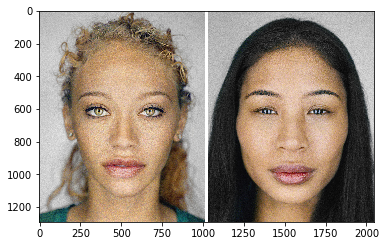

In [30]:
image = cv2.imread('/home/antreas/Desktop/test24.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)




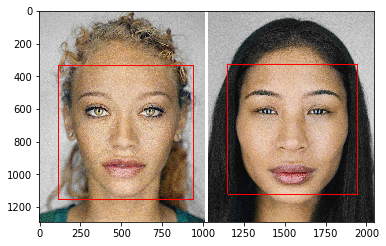

In [72]:
face_cascade = cv2.CascadeClassifier('/home/antreas/Desktop/keypoint/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=10)
image_with_detections = np.copy(image)

for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

plt.imshow(image_with_detections)

In [73]:
imar=[]
for (x, y, w, h) in faces:
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = gray[y:y + h, x:x + w]
#     print("[INFO] Object found. Saving locally.")
    res = cv2.resize(roi_color, (96,96))
    reshape_img = np.reshape(res, (96,96,1)) / 255
    imar.append(reshape_img)
    
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
#     cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)
#     cv2.imshow('s' , roi_color)

# status = cv2.imwrite('faces_detected.jpg', image)
# print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

imar = model.predict(np.array(imar))

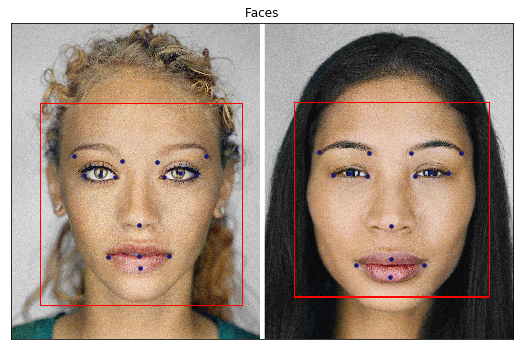

In [74]:
# plot our image and the detected facial points
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

for i in range(imar.shape[0]):
    orig_x,orig_y,orig_w,orig_h = faces[i]
    
    # denormalize points
    pts_x = imar[i][0::2] * orig_w/2 + orig_w/2 + orig_x 
    pts_y = imar[i][1::2] * orig_h/2 + orig_h/2 + orig_y
    
    ax1.scatter(pts_x,pts_y, marker='.', c='midnightblue', s=50) 


ax1.set_title('Faces')
ax1.imshow(image_with_detections)